<a href="https://colab.research.google.com/github/cboomus/SAT5114/blob/main/SAT5114LgRev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Purpose: to predict maximum lung volume and maximum inhalation flow rate
# based on features of weight, height, sex, age, ethnicity, and race

In [2]:
# This section converts the dataset TXT file to a CSV file

import pandas as pd

# Input and output file names
input_file_name = '/content/drive/MyDrive/spirotidydatafinal.txt'
output_file_name = '/content/drive/MyDrive/spirotidydatafinal.csv'

# Define column labels
columns = ['ID', 'Visit', 'Trial', 'Time', 'Volume', 'Flow']

# Read data from txt file using pandas
df = pd.read_csv(input_file_name, names=columns, skiprows=1)

# Write data to csv file
df.to_csv(output_file_name, index=False)

In [3]:
# This section counts how many rows of data are present in the
# spirotidydatafinal.csv dataset and includes the first row containing labels

import csv

csv_file_path = '/content/drive/MyDrive/spirotidydatafinal.csv'

def count_rows(csv_path):
    with open(csv_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

# Get the number of rows in the CSV file
num_rows = count_rows(csv_file_path)

print(f"The CSV file '{csv_file_path}' has {num_rows} rows.")


The CSV file '/content/drive/MyDrive/spirotidydatafinal.csv' has 2287214 rows.


In [4]:
# This section counts the number of rows that contain NaN values
# then deletes them and recounts the number of remaining rows

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Count the number of rows containing NaN values
num_nan_rows = df.isna().any(axis=1).sum()

# Drop rows containing NaN values
df = df.dropna()

# Count the number of rows after dropping NaN values
num_rows_after = len(df)

print(f"The CSV file '{csv_file_path}' has {num_nan_rows} rows containing NaN values.")
print(f"{num_nan_rows} rows have been dropped.")
print(f"Now, the CSV file has {num_rows_after} rows after dropping NaN values.")


The CSV file '/content/drive/MyDrive/spirotidydatafinal.csv' has 1231977 rows containing NaN values.
1231977 rows have been dropped.
Now, the CSV file has 1055236 rows after dropping NaN values.


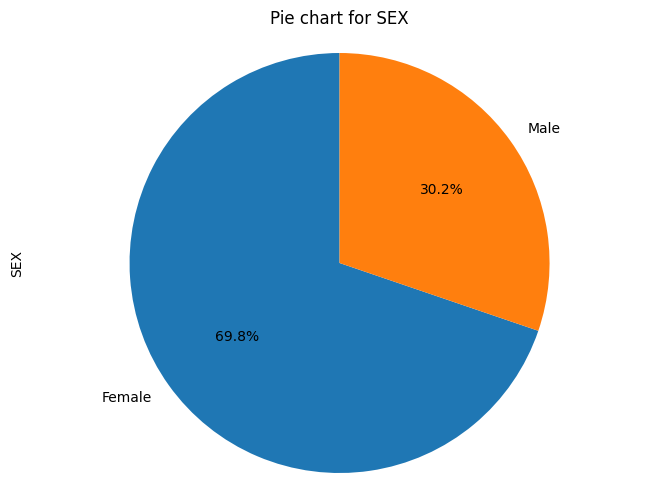

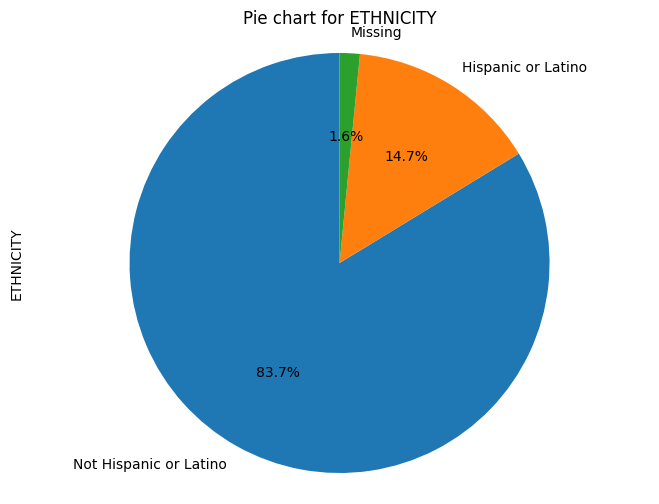

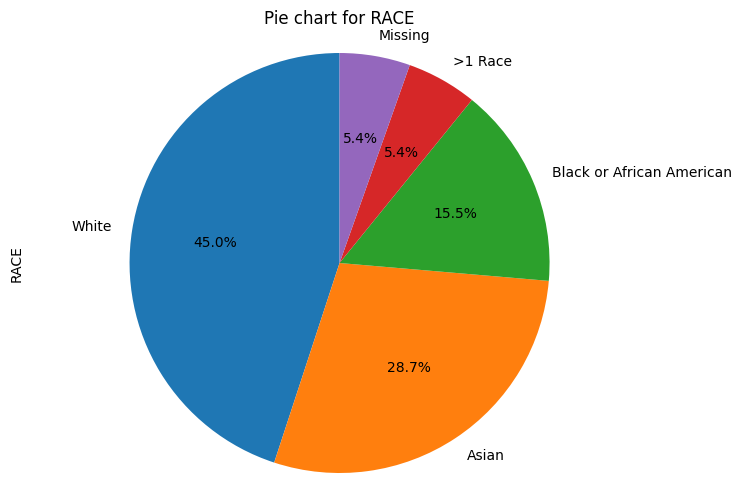

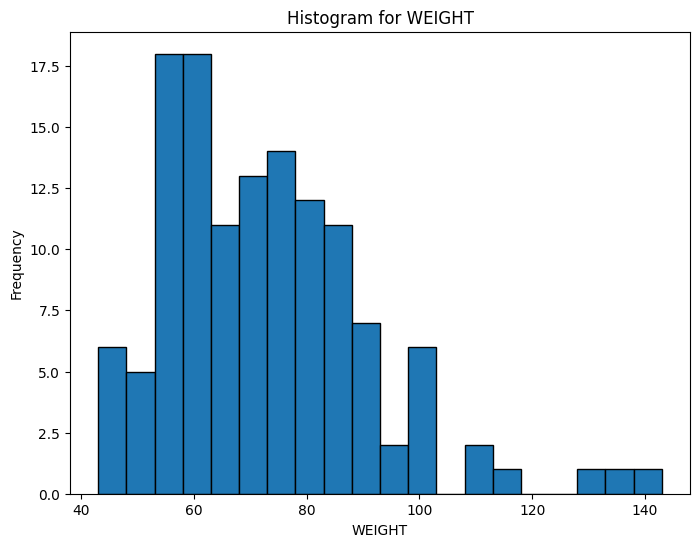

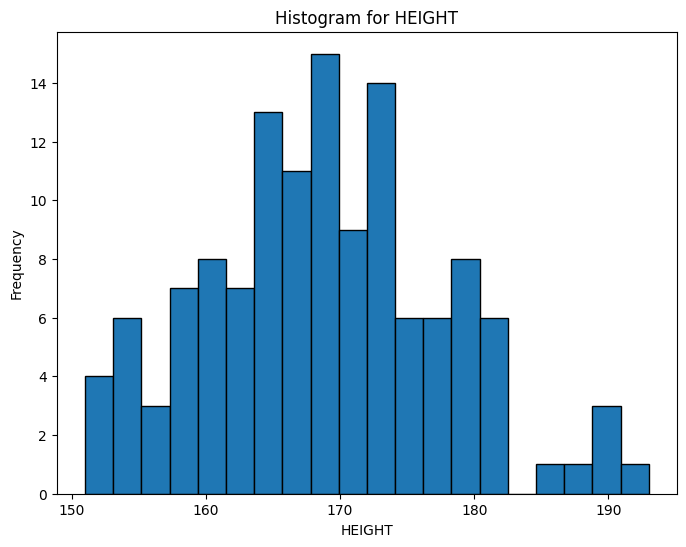

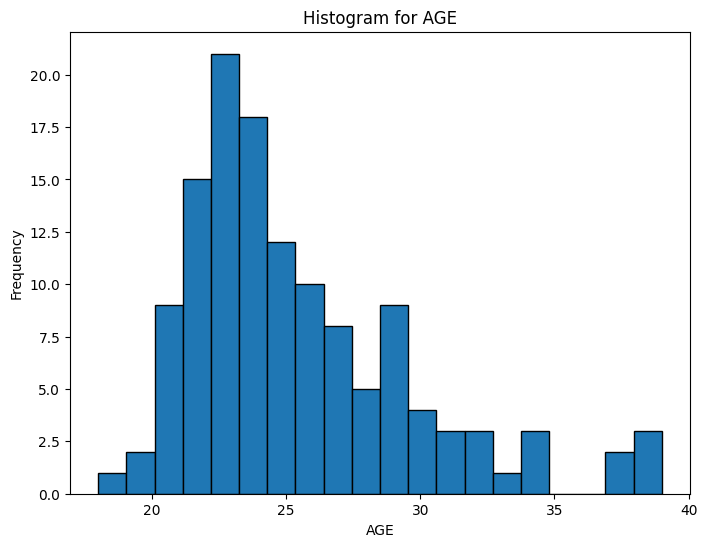

In [5]:
# This section displays the categorical data in pie charts and
# numerical data in histogram charts

import matplotlib.pyplot as plt

# Specify the CSV file path
demographics_csv_path = '/content/drive/MyDrive/demographics_data.csv'

# Read the CSV file into a pandas DataFrame
demographics_df = pd.read_csv(demographics_csv_path)

# Pie charts for categorical columns
categorical_columns = ['SEX', 'ETHNICITY', 'RACE']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    demographics_df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie chart for {column}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Histograms for numerical columns
numerical_columns = ['WEIGHT', 'HEIGHT', 'AGE']

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    demographics_df[column].plot.hist(bins=20, edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [6]:
# This section changes the volume and flow values to numeric values and
# finds the max volume and negative flow rate for each
# ID, Visit, and Trial and saves in df spiro_data_max.csv

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/spirotidydatafinal.csv')

# Convert 'Volume' and 'Flow' columns to numeric
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df['Flow'] = pd.to_numeric(df['Flow'], errors='coerce')

# Group by ID, Visit, and Trial
grouped_df = df.groupby(['ID', 'Visit', 'Trial'])

# Find the maximum volume for each group
max_volume = grouped_df['Volume'].max().reset_index()

# Find the max negative flow for each group
max_flow = grouped_df['Flow'].min().reset_index()

# Merge the results on 'ID', 'Visit', and 'Trial'
max_values = pd.merge(max_volume, max_flow, on=['ID', 'Visit', 'Trial'])

# Rename columns to 'Max Volume' and 'Max Flow'
max_values = max_values.rename(columns={'Volume': 'Max Volume', 'Flow': 'Max Flow'})

# Save the result to a new CSV file in the same directory
max_values.to_csv('spiro_data_max.csv', index=False)


In [7]:
# This section calculates the skew for the data features weight, height, and age

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/demographics_data.csv')

# Calculate skewness for WEIGHT, HEIGHT, and AGE columns
skewness_weight = df['WEIGHT'].skew()
skewness_height = df['HEIGHT'].skew()
skewness_age = df['AGE'].skew()

print(f"Skewness for WEIGHT: {skewness_weight:.2f}")
print(f"Skewness for HEIGHT: {skewness_height:.2f}")
print(f"Skewness for AGE: {skewness_age:.2f}")


Skewness for WEIGHT: 1.14
Skewness for HEIGHT: 0.28
Skewness for AGE: 1.22


In [8]:
# This section merges the demographic file demographics_data.csv
# with the newly created file spiro_data_max.csv  and are matched
# by the index value ID

# Load spiro_data_max.csv
max_values = pd.read_csv('/content/drive/MyDrive/spiro_data_max.csv')

# Load demographics_data.csv
demographics_data = pd.read_csv('/content/drive/MyDrive/demographics_data.csv')

# Merge the two DataFrames on the 'ID' column
merged_data = pd.merge(max_values, demographics_data, on='ID')

# Rename columns to lowercase
merged_data = merged_data.rename(columns={
    'WEIGHT': 'Weight',
    'HEIGHT': 'Height',
    'SEX': 'Sex',
    'AGE': 'Age',
    'ETHNICITY': 'Ethnicity',
    'RACE': 'Race'
})

# Save the merged result to a new CSV file
merged_data.to_csv('/content/drive/MyDrive/merged_data.csv', index=False)


In [9]:
# This section processes the data to create binary data for
# the categorical columns Sex, Ethnicity, and Race

# Load merged_data.csv
merged_data = pd.read_csv('/content/drive/MyDrive/merged_data.csv')

# Use get_dummies to one-hot encode 'Sex', 'Ethnicity', and 'Race'
merged_data_encoded = pd.get_dummies(merged_data, columns=['Sex', 'Ethnicity', 'Race'])

# Save the one-hot encoded result to a new CSV file
merged_data_encoded.to_csv('merged_data_encoded.csv', index=False)


In [10]:
# The section normalizes the features Weight, Height, and Age

from sklearn.preprocessing import MinMaxScaler

# Load the CSV file into a DataFrame
file_path = '/content/drive/MyDrive/merged_data_encoded.csv'
df = pd.read_csv(file_path)

# Extract the columns to normalize
columns_to_normalize = ['Weight', 'Height', 'Age']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Specify the new file path to save the normalized DataFrame
new_file_path = '/content/drive/MyDrive/normalized_data.csv'

# Save the normalized DataFrame to the new CSV file
df.to_csv(new_file_path, index=False)

print("Normalization complete. The normalized DataFrame has been saved to:", new_file_path)


Normalization complete. The normalized DataFrame has been saved to: /content/drive/MyDrive/normalized_data.csv


In [11]:
# This section uses train_test_split to split the data into
# training and test data

from sklearn.model_selection import train_test_split

# Load the CSV file into a DataFrame
file_path = '/content/drive/MyDrive/normalized_data.csv'
data = pd.read_csv(file_path)

# Define features and target columns
features = [
    'Weight', 'Height', 'Age',
    'Sex_Female', 'Sex_Male',
    'Ethnicity_Hispanic or Latino', 'Ethnicity_Missing', 'Ethnicity_Not Hispanic or Latino',
    'Race_>1 Race', 'Race_Asian', 'Race_Black or African American', 'Race_Missing', 'Race_White'
]

targets = ['Max Volume', 'Max Flow']

# Split the data into features (X) and targets (y)
X = data[features]
y = data[targets]

# Perform the 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

# Print the shapes of the training and test sets
print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)




Training data shape: (989, 13) (989, 2)
Test data shape: (248, 13) (248, 2)


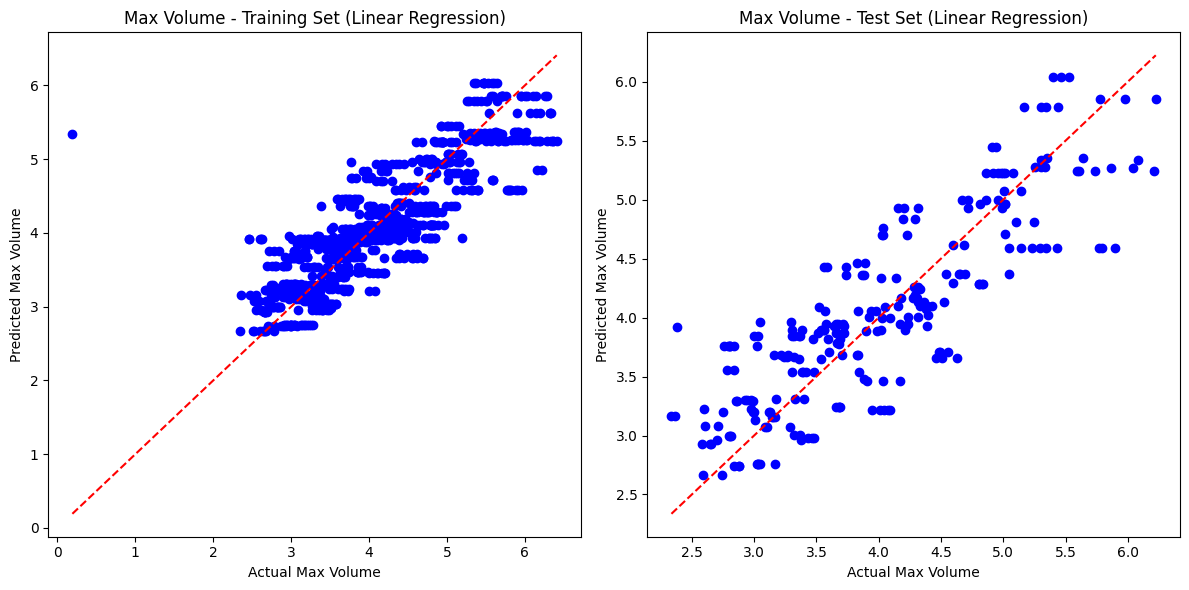

Max Volume - Training Set:
Mean Squared Error: 0.23069524590221185
Root Mean Squared Error: 0.4803074493511545

Max Volume - Test Set:
Mean Squared Error: 0.2316662030909778
Root Mean Squared Error: 0.48131715437014894


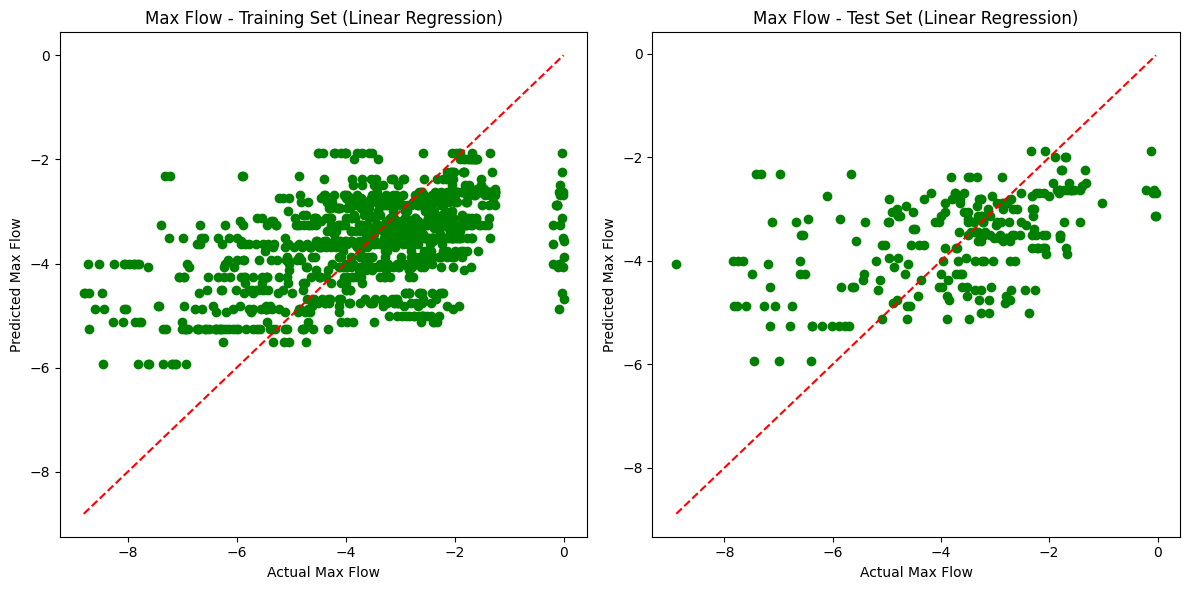


Max Flow - Training Set:
Mean Squared Error: 2.171003574836982
Root Mean Squared Error: 1.4734325823861036

Max Flow - Test Set:
Mean Squared Error: 2.3970802256704635
Root Mean Squared Error: 1.5482506985854918


In [ ]:
# This section uses a linear regression algorithm to predict
# max volume and max flow

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Create linear regression models for Max Volume and Max Flow
model_max_volume = LinearRegression()
model_max_flow = LinearRegression()

# Fit the model to the training data for Max Volume
model_max_volume.fit(X_train, y_train['Max Volume'].values.reshape(-1, 1))

# Make predictions on the training data for Max Volume
y_train_pred_max_volume = model_max_volume.predict(X_train)

# Make predictions on the test data for Max Volume
y_test_pred_max_volume = model_max_volume.predict(X_test)

# Evaluate the model on the training set for Max Volume
mse_train_max_volume = mean_squared_error(y_train['Max Volume'].values, y_train_pred_max_volume)
rmse_train_max_volume = np.sqrt(mse_train_max_volume)

# Evaluate the model on the test set for Max Volume
mse_test_max_volume = mean_squared_error(y_test['Max Volume'].values, y_test_pred_max_volume)
rmse_test_max_volume = np.sqrt(mse_test_max_volume)

# Plot for Max Volume - Training Set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train['Max Volume'].values, y_train_pred_max_volume, color='blue')
plt.plot([y_train['Max Volume'].values.min(), y_train['Max Volume'].values.max()], [y_train['Max Volume'].values.min(), y_train['Max Volume'].values.max()], linestyle='--', color='red')
plt.title('Max Volume - Training Set (Linear Regression)')
plt.xlabel('Actual Max Volume')
plt.ylabel('Predicted Max Volume')

# Plot for Max Volume - Test Set
plt.subplot(1, 2, 2)
plt.scatter(y_test['Max Volume'].values, y_test_pred_max_volume, color='blue')
plt.plot([y_test['Max Volume'].values.min(), y_test['Max Volume'].values.max()], [y_test['Max Volume'].values.min(), y_test['Max Volume'].values.max()], linestyle='--', color='red')
plt.title('Max Volume - Test Set (Linear Regression)')
plt.xlabel('Actual Max Volume')
plt.ylabel('Predicted Max Volume')

plt.tight_layout()
plt.show()

print("Max Volume - Training Set:")
print("Mean Squared Error:", mse_train_max_volume)
print("Root Mean Squared Error:", rmse_train_max_volume)

print("\nMax Volume - Test Set:")
print("Mean Squared Error:", mse_test_max_volume)
print("Root Mean Squared Error:", rmse_test_max_volume)

# Fit the model to the training data for Max Flow
model_max_flow.fit(X_train, y_train['Max Flow'].values.reshape(-1, 1))

# Make predictions on the training data for Max Flow
y_train_pred_max_flow = model_max_flow.predict(X_train)

# Make predictions on the test data for Max Flow
y_test_pred_max_flow = model_max_flow.predict(X_test)

# Evaluate the model on the training set for Max Flow
mse_train_max_flow = mean_squared_error(y_train['Max Flow'].values, y_train_pred_max_flow)
rmse_train_max_flow = np.sqrt(mse_train_max_flow)

# Evaluate the model on the test set for Max Flow
mse_test_max_flow = mean_squared_error(y_test['Max Flow'].values, y_test_pred_max_flow)
rmse_test_max_flow = np.sqrt(mse_test_max_flow)

# Plot for Max Flow - Training Set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train['Max Flow'].values, y_train_pred_max_flow, color='green')
plt.plot([y_train['Max Flow'].values.min(), y_train['Max Flow'].values.max()], [y_train['Max Flow'].values.min(), y_train['Max Flow'].values.max()], linestyle='--', color='red')
plt.title('Max Flow - Training Set (Linear Regression)')
plt.xlabel('Actual Max Flow')
plt.ylabel('Predicted Max Flow')

# Plot for Max Flow - Test Set
plt.subplot(1, 2, 2)
plt.scatter(y_test['Max Flow'].values, y_test_pred_max_flow, color='green')
plt.plot([y_test['Max Flow'].values.min(), y_test['Max Flow'].values.max()], [y_test['Max Flow'].values.min(), y_test['Max Flow'].values.max()], linestyle='--', color='red')
plt.title('Max Flow - Test Set (Linear Regression)')
plt.xlabel('Actual Max Flow')
plt.ylabel('Predicted Max Flow')

plt.tight_layout()
plt.show()

print("\nMax Flow - Training Set:")
print("Mean Squared Error:", mse_train_max_flow)
print("Root Mean Squared Error:", rmse_train_max_flow)

print("\nMax Flow - Test Set:")
print("Mean Squared Error:", mse_test_max_flow)
print("Root Mean Squared Error:", rmse_test_max_flow)


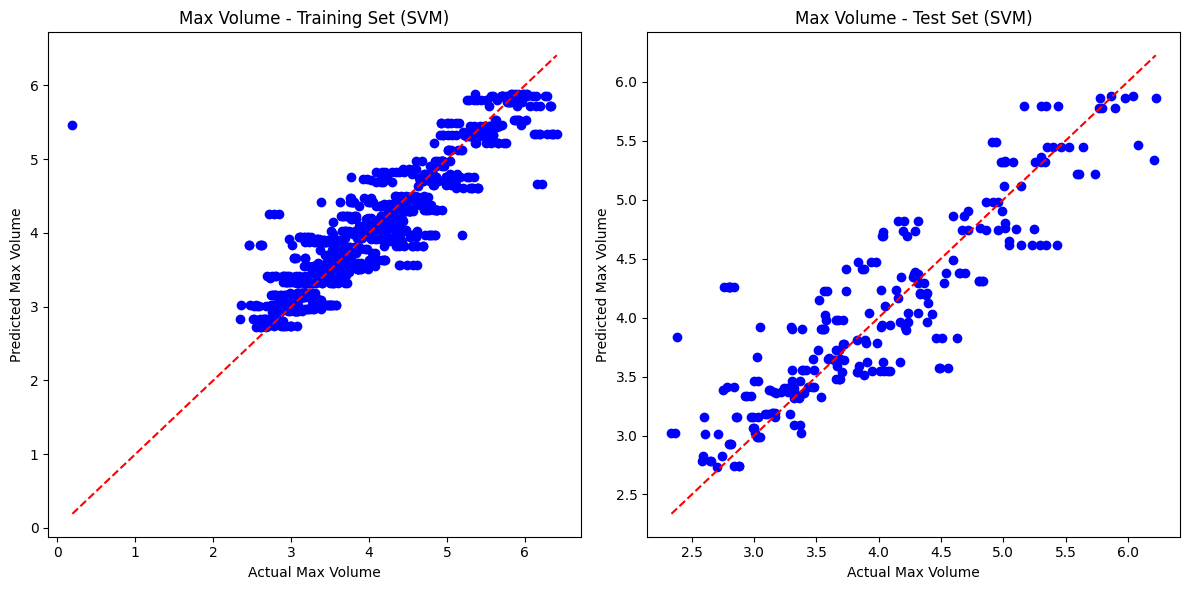

Max Volume - Training Set (SVM):
Mean Squared Error: 0.15770050522376614
Root Mean Squared Error: 0.39711522915114467

Max Volume - Test Set (SVM):
Mean Squared Error: 0.1859340904130468
Root Mean Squared Error: 0.43120075418886594


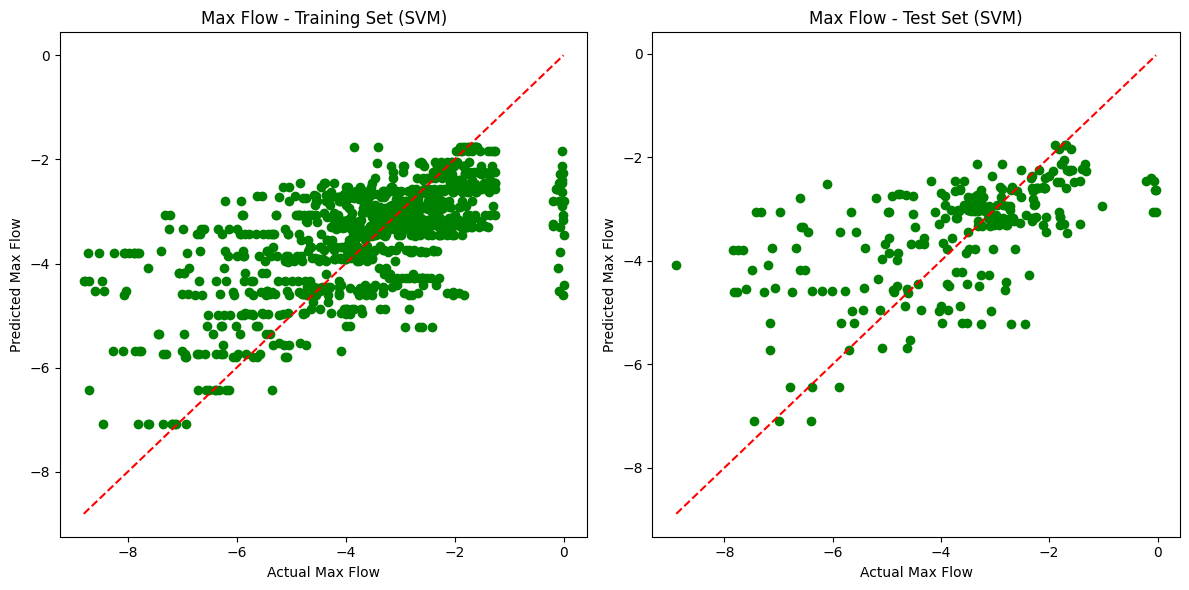


Max Flow - Training Set (SVM):
Mean Squared Error: 1.7814371265111615
Root Mean Squared Error: 1.3347048836769728

Max Flow - Test Set (SVM):
Mean Squared Error: 2.1497943616611876
Root Mean Squared Error: 1.466217706093194


In [ ]:
# This section uses an SVM algorithm to predict max volume and max flow

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Create SVM regression models for Max Volume and Max Flow
model_max_volume_svm = SVR()
model_max_flow_svm = SVR()

# Fit the model to the training data for Max Volume
model_max_volume_svm.fit(X_train, y_train['Max Volume'].values)

# Make predictions on the training data for Max Volume
y_train_pred_max_volume_svm = model_max_volume_svm.predict(X_train)

# Make predictions on the test data for Max Volume
y_test_pred_max_volume_svm = model_max_volume_svm.predict(X_test)

# Evaluate the model on the training set for Max Volume
mse_train_max_volume_svm = mean_squared_error(y_train['Max Volume'].values, y_train_pred_max_volume_svm)
rmse_train_max_volume_svm = np.sqrt(mse_train_max_volume_svm)

# Evaluate the model on the test set for Max Volume
mse_test_max_volume_svm = mean_squared_error(y_test['Max Volume'].values, y_test_pred_max_volume_svm)
rmse_test_max_volume_svm = np.sqrt(mse_test_max_volume_svm)

# Plot for Max Volume - Training Set (SVM)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train['Max Volume'].values, y_train_pred_max_volume_svm, color='blue')
plt.plot([y_train['Max Volume'].values.min(), y_train['Max Volume'].values.max()], [y_train['Max Volume'].values.min(), y_train['Max Volume'].values.max()], linestyle='--', color='red')
plt.title('Max Volume - Training Set (SVM)')
plt.xlabel('Actual Max Volume')
plt.ylabel('Predicted Max Volume')

# Plot for Max Volume - Test Set (SVM)
plt.subplot(1, 2, 2)
plt.scatter(y_test['Max Volume'].values, y_test_pred_max_volume_svm, color='blue')
plt.plot([y_test['Max Volume'].values.min(), y_test['Max Volume'].values.max()], [y_test['Max Volume'].values.min(), y_test['Max Volume'].values.max()], linestyle='--', color='red')
plt.title('Max Volume - Test Set (SVM)')
plt.xlabel('Actual Max Volume')
plt.ylabel('Predicted Max Volume')

plt.tight_layout()
plt.show()

print("Max Volume - Training Set (SVM):")
print("Mean Squared Error:", mse_train_max_volume_svm)
print("Root Mean Squared Error:", rmse_train_max_volume_svm)

print("\nMax Volume - Test Set (SVM):")
print("Mean Squared Error:", mse_test_max_volume_svm)
print("Root Mean Squared Error:", rmse_test_max_volume_svm)

# Fit the model to the training data for Max Flow
model_max_flow_svm.fit(X_train, y_train['Max Flow'].values)

# Make predictions on the training data for Max Flow
y_train_pred_max_flow_svm = model_max_flow_svm.predict(X_train)

# Make predictions on the test data for Max Flow
y_test_pred_max_flow_svm = model_max_flow_svm.predict(X_test)

# Evaluate the model on the training set for Max Flow
mse_train_max_flow_svm = mean_squared_error(y_train['Max Flow'].values, y_train_pred_max_flow_svm)
rmse_train_max_flow_svm = np.sqrt(mse_train_max_flow_svm)

# Evaluate the model on the test set for Max Flow
mse_test_max_flow_svm = mean_squared_error(y_test['Max Flow'].values, y_test_pred_max_flow_svm)
rmse_test_max_flow_svm = np.sqrt(mse_test_max_flow_svm)

# Plot for Max Flow - Training Set (SVM)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train['Max Flow'].values, y_train_pred_max_flow_svm, color='green')
plt.plot([y_train['Max Flow'].values.min(), y_train['Max Flow'].values.max()], [y_train['Max Flow'].values.min(), y_train['Max Flow'].values.max()], linestyle='--', color='red')
plt.title('Max Flow - Training Set (SVM)')
plt.xlabel('Actual Max Flow')
plt.ylabel('Predicted Max Flow')

# Plot for Max Flow - Test Set (SVM)
plt.subplot(1, 2, 2)
plt.scatter(y_test['Max Flow'].values, y_test_pred_max_flow_svm, color='green')
plt.plot([y_test['Max Flow'].values.min(), y_test['Max Flow'].values.max()], [y_test['Max Flow'].values.min(), y_test['Max Flow'].values.max()], linestyle='--', color='red')
plt.title('Max Flow - Test Set (SVM)')
plt.xlabel('Actual Max Flow')
plt.ylabel('Predicted Max Flow')

plt.tight_layout()
plt.show()

print("\nMax Flow - Training Set (SVM):")
print("Mean Squared Error:", mse_train_max_flow_svm)
print("Root Mean Squared Error:", rmse_train_max_flow_svm)

print("\nMax Flow - Test Set (SVM):")
print("Mean Squared Error:", mse_test_max_flow_svm)
print("Root Mean Squared Error:", rmse_test_max_flow_svm)


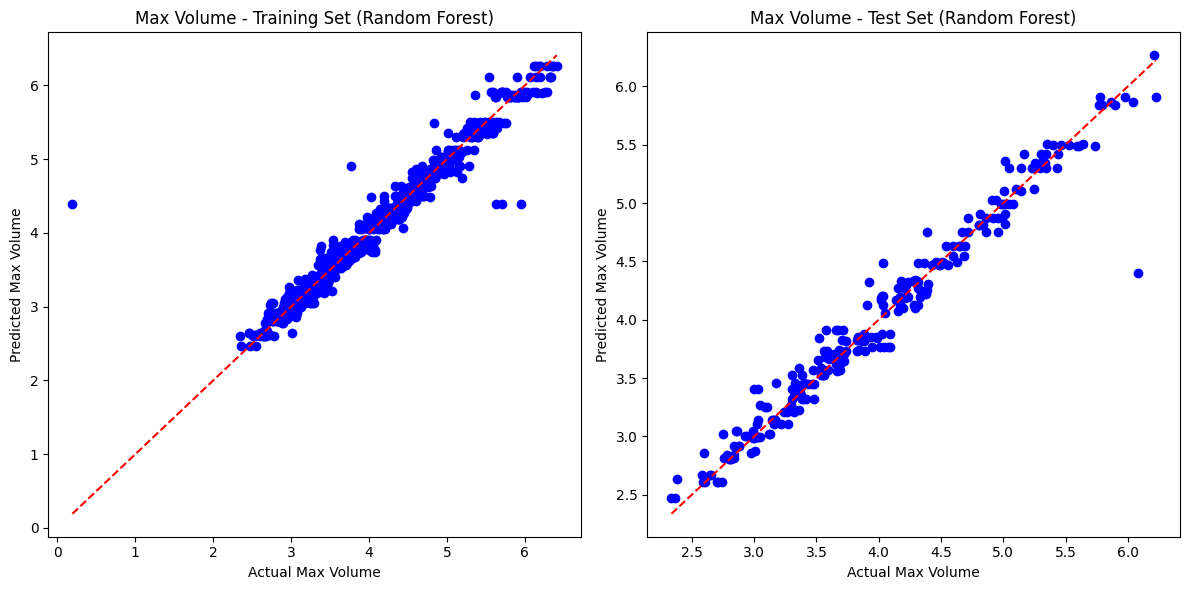

Max Volume - Training Set (Random Forest):
Mean Squared Error: 0.038335729168741915
Root Mean Squared Error: 0.19579512039052943

Max Volume - Test Set (Random Forest):
Mean Squared Error: 0.02850146143461827
Root Mean Squared Error: 0.1688237585016347


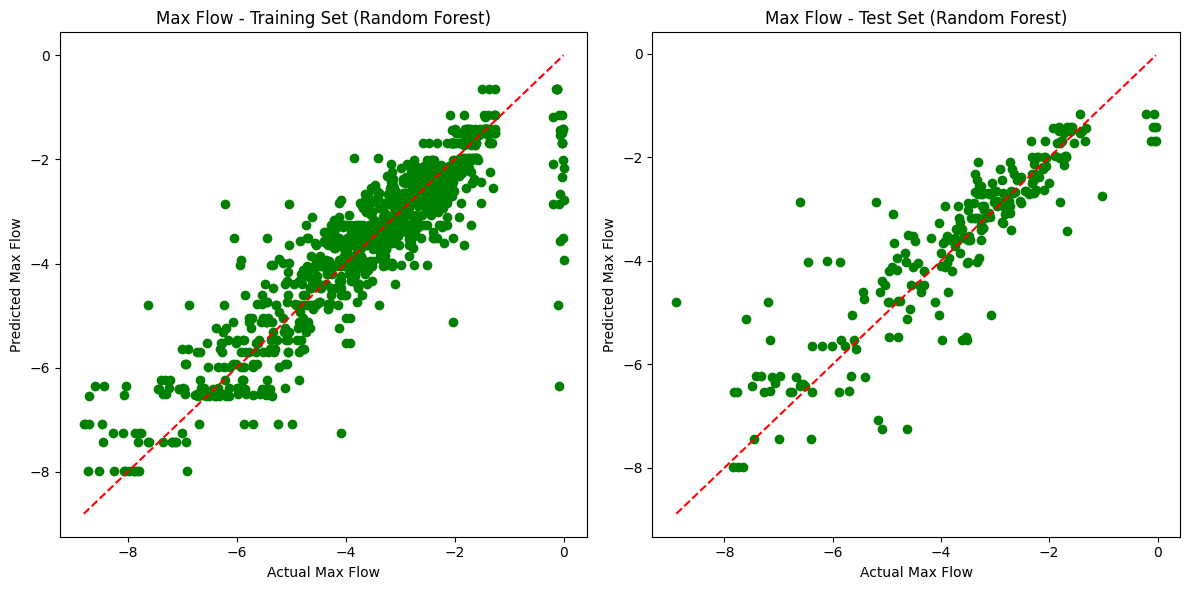


Max Flow - Training Set (Random Forest):
Mean Squared Error: 0.5469679472836806
Root Mean Squared Error: 0.7395728140512472

Max Flow - Test Set (Random Forest):
Mean Squared Error: 0.6901109169045957
Root Mean Squared Error: 0.830729147739861


In [12]:
# This section uses Random Forest algorithm to predict max volume and max flow

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


# Create Random Forest regression models for Max Volume and Max Flow
model_max_volume_rf = RandomForestRegressor()
model_max_flow_rf = RandomForestRegressor()

# Fit the model to the training data for Max Volume
model_max_volume_rf.fit(X_train, y_train['Max Volume'].values)

# Make predictions on the training data for Max Volume
y_train_pred_max_volume_rf = model_max_volume_rf.predict(X_train)

# Make predictions on the test data for Max Volume
y_test_pred_max_volume_rf = model_max_volume_rf.predict(X_test)

# Evaluate the model on the training set for Max Volume
mse_train_max_volume_rf = mean_squared_error(y_train['Max Volume'].values, y_train_pred_max_volume_rf)
rmse_train_max_volume_rf = np.sqrt(mse_train_max_volume_rf)

# Evaluate the model on the test set for Max Volume
mse_test_max_volume_rf = mean_squared_error(y_test['Max Volume'].values, y_test_pred_max_volume_rf)
rmse_test_max_volume_rf = np.sqrt(mse_test_max_volume_rf)

# Plot for Max Volume - Training Set (Random Forest)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train['Max Volume'].values, y_train_pred_max_volume_rf, color='blue')
plt.plot([y_train['Max Volume'].values.min(), y_train['Max Volume'].values.max()], [y_train['Max Volume'].values.min(), y_train['Max Volume'].values.max()], linestyle='--', color='red')
plt.title('Max Volume - Training Set (Random Forest)')
plt.xlabel('Actual Max Volume')
plt.ylabel('Predicted Max Volume')

# Plot for Max Volume - Test Set (Random Forest)
plt.subplot(1, 2, 2)
plt.scatter(y_test['Max Volume'].values, y_test_pred_max_volume_rf, color='blue')
plt.plot([y_test['Max Volume'].values.min(), y_test['Max Volume'].values.max()], [y_test['Max Volume'].values.min(), y_test['Max Volume'].values.max()], linestyle='--', color='red')
plt.title('Max Volume - Test Set (Random Forest)')
plt.xlabel('Actual Max Volume')
plt.ylabel('Predicted Max Volume')

plt.tight_layout()
plt.show()

print("Max Volume - Training Set (Random Forest):")
print("Mean Squared Error:", mse_train_max_volume_rf)
print("Root Mean Squared Error:", rmse_train_max_volume_rf)

print("\nMax Volume - Test Set (Random Forest):")
print("Mean Squared Error:", mse_test_max_volume_rf)
print("Root Mean Squared Error:", rmse_test_max_volume_rf)

# Fit the model to the training data for Max Flow
model_max_flow_rf.fit(X_train, y_train['Max Flow'].values)

# Make predictions on the training data for Max Flow
y_train_pred_max_flow_rf = model_max_flow_rf.predict(X_train)

# Make predictions on the test data for Max Flow
y_test_pred_max_flow_rf = model_max_flow_rf.predict(X_test)

# Evaluate the model on the training set for Max Flow
mse_train_max_flow_rf = mean_squared_error(y_train['Max Flow'].values, y_train_pred_max_flow_rf)
rmse_train_max_flow_rf = np.sqrt(mse_train_max_flow_rf)

# Evaluate the model on the test set for Max Flow
mse_test_max_flow_rf = mean_squared_error(y_test['Max Flow'].values, y_test_pred_max_flow_rf)
rmse_test_max_flow_rf = np.sqrt(mse_test_max_flow_rf)

# Plot for Max Flow - Training Set (Random Forest)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train['Max Flow'].values, y_train_pred_max_flow_rf, color='green')
plt.plot([y_train['Max Flow'].values.min(), y_train['Max Flow'].values.max()], [y_train['Max Flow'].values.min(), y_train['Max Flow'].values.max()], linestyle='--', color='red')
plt.title('Max Flow - Training Set (Random Forest)')
plt.xlabel('Actual Max Flow')
plt.ylabel('Predicted Max Flow')

# Plot for Max Flow - Test Set (Random Forest)
plt.subplot(1, 2, 2)
plt.scatter(y_test['Max Flow'].values, y_test_pred_max_flow_rf, color='green')
plt.plot([y_test['Max Flow'].values.min(), y_test['Max Flow'].values.max()], [y_test['Max Flow'].values.min(), y_test['Max Flow'].values.max()], linestyle='--', color='red')
plt.title('Max Flow - Test Set (Random Forest)')
plt.xlabel('Actual Max Flow')
plt.ylabel('Predicted Max Flow')

plt.tight_layout()
plt.show()

print("\nMax Flow - Training Set (Random Forest):")
print("Mean Squared Error:", mse_train_max_flow_rf)
print("Root Mean Squared Error:", rmse_train_max_flow_rf)

print("\nMax Flow - Test Set (Random Forest):")
print("Mean Squared Error:", mse_test_max_flow_rf)
print("Root Mean Squared Error:", rmse_test_max_flow_rf)


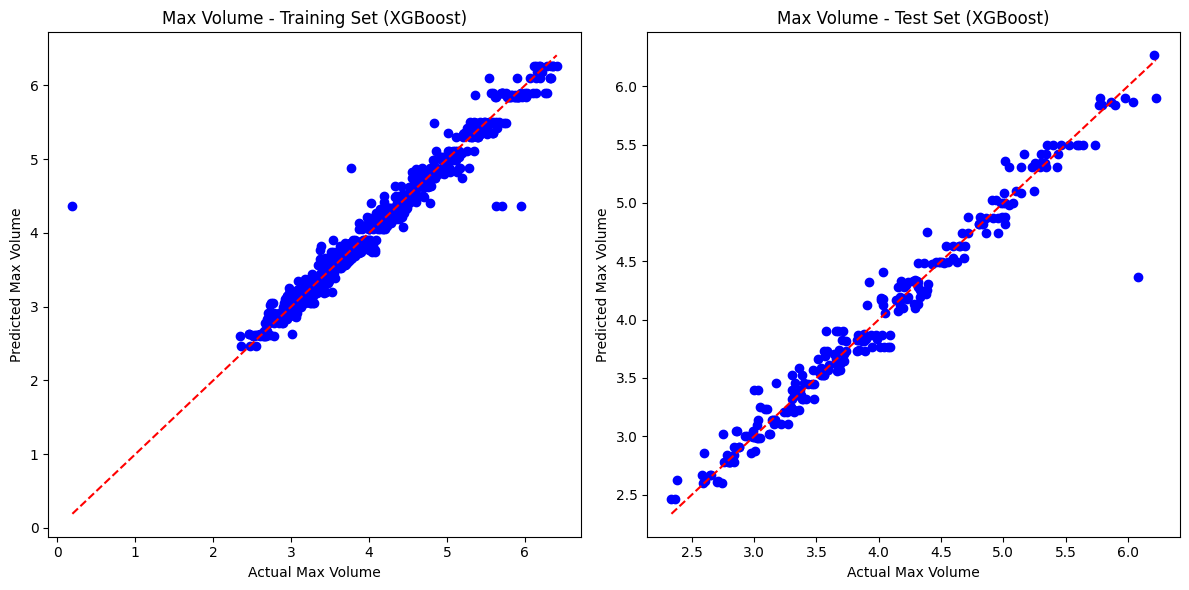

Max Volume - Training Set (XGBoost):
Mean Squared Error: 0.038003221698170664
Root Mean Squared Error: 0.19494415020248917

Max Volume - Test Set (XGBoost):
Mean Squared Error: 0.028005602491812876
Root Mean Squared Error: 0.16734874511573988


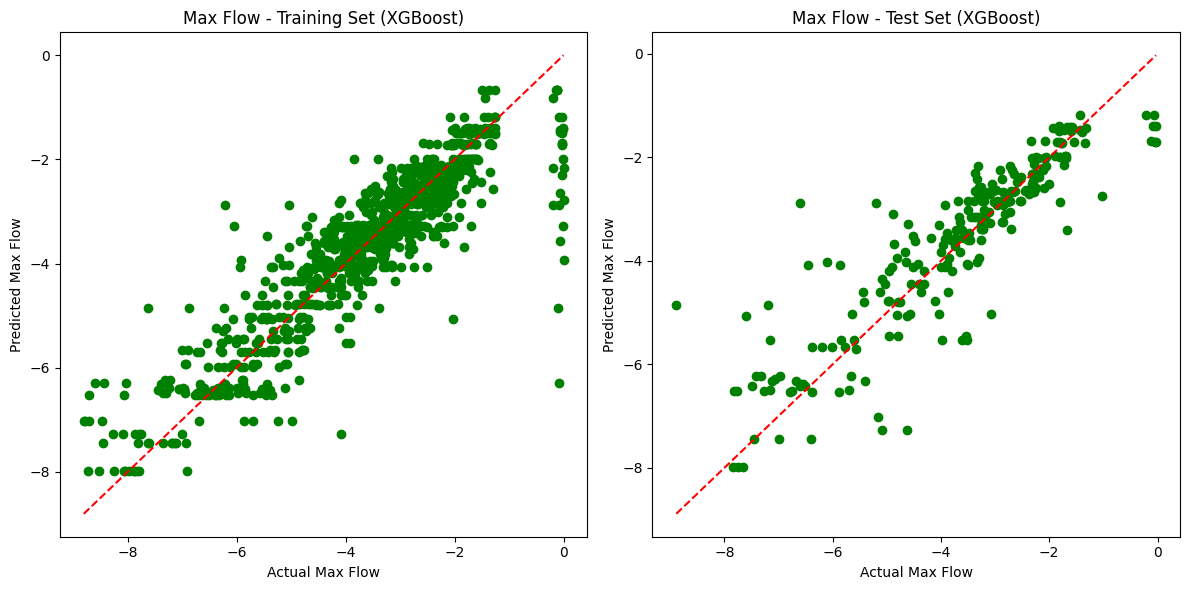


Max Flow - Training Set (XGBoost):
Mean Squared Error: 0.5444826163186964
Root Mean Squared Error: 0.7378906533617948

Max Flow - Test Set (XGBoost):
Mean Squared Error: 0.6875357018258136
Root Mean Squared Error: 0.8291777263203671


In [ ]:
# This section uses XGBoost algorithm to predict max volume and max flow

from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor  # Import XGBoost

# Create XGBoost regression models for Max Volume and Max Flow
model_max_volume_xgb = XGBRegressor()
model_max_flow_xgb = XGBRegressor()

# Fit the model to the training data for Max Volume
model_max_volume_xgb.fit(X_train, y_train['Max Volume'].values)

# Make predictions on the training data for Max Volume
y_train_pred_max_volume_xgb = model_max_volume_xgb.predict(X_train)

# Make predictions on the test data for Max Volume
y_test_pred_max_volume_xgb = model_max_volume_xgb.predict(X_test)

# Evaluate the model on the training set for Max Volume
mse_train_max_volume_xgb = mean_squared_error(y_train['Max Volume'].values, y_train_pred_max_volume_xgb)
rmse_train_max_volume_xgb = np.sqrt(mse_train_max_volume_xgb)

# Evaluate the model on the test set for Max Volume
mse_test_max_volume_xgb = mean_squared_error(y_test['Max Volume'].values, y_test_pred_max_volume_xgb)
rmse_test_max_volume_xgb = np.sqrt(mse_test_max_volume_xgb)

# Plot for Max Volume - Training Set (XGBoost)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train['Max Volume'].values, y_train_pred_max_volume_xgb, color='blue')
plt.plot([y_train['Max Volume'].values.min(), y_train['Max Volume'].values.max()], [y_train['Max Volume'].values.min(), y_train['Max Volume'].values.max()], linestyle='--', color='red')
plt.title('Max Volume - Training Set (XGBoost)')
plt.xlabel('Actual Max Volume')
plt.ylabel('Predicted Max Volume')

# Plot for Max Volume - Test Set (XGBoost)
plt.subplot(1, 2, 2)
plt.scatter(y_test['Max Volume'].values, y_test_pred_max_volume_xgb, color='blue')
plt.plot([y_test['Max Volume'].values.min(), y_test['Max Volume'].values.max()], [y_test['Max Volume'].values.min(), y_test['Max Volume'].values.max()], linestyle='--', color='red')
plt.title('Max Volume - Test Set (XGBoost)')
plt.xlabel('Actual Max Volume')
plt.ylabel('Predicted Max Volume')

plt.tight_layout()
plt.show()

print("Max Volume - Training Set (XGBoost):")
print("Mean Squared Error:", mse_train_max_volume_xgb)
print("Root Mean Squared Error:", rmse_train_max_volume_xgb)

print("\nMax Volume - Test Set (XGBoost):")
print("Mean Squared Error:", mse_test_max_volume_xgb)
print("Root Mean Squared Error:", rmse_test_max_volume_xgb)

# Fit the model to the training data for Max Flow
model_max_flow_xgb.fit(X_train, y_train['Max Flow'].values)

# Make predictions on the training data for Max Flow
y_train_pred_max_flow_xgb = model_max_flow_xgb.predict(X_train)

# Make predictions on the test data for Max Flow
y_test_pred_max_flow_xgb = model_max_flow_xgb.predict(X_test)

# Evaluate the model on the training set for Max Flow
mse_train_max_flow_xgb = mean_squared_error(y_train['Max Flow'].values, y_train_pred_max_flow_xgb)
rmse_train_max_flow_xgb = np.sqrt(mse_train_max_flow_xgb)

# Evaluate the model on the test set for Max Flow
mse_test_max_flow_xgb = mean_squared_error(y_test['Max Flow'].values, y_test_pred_max_flow_xgb)
rmse_test_max_flow_xgb = np.sqrt(mse_test_max_flow_xgb)

# Plot for Max Flow - Training Set (XGBoost)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train['Max Flow'].values, y_train_pred_max_flow_xgb, color='green')
plt.plot([y_train['Max Flow'].values.min(), y_train['Max Flow'].values.max()], [y_train['Max Flow'].values.min(), y_train['Max Flow'].values.max()], linestyle='--', color='red')
plt.title('Max Flow - Training Set (XGBoost)')
plt.xlabel('Actual Max Flow')
plt.ylabel('Predicted Max Flow')

# Plot for Max Flow - Test Set (XGBoost)
plt.subplot(1, 2, 2)
plt.scatter(y_test['Max Flow'].values, y_test_pred_max_flow_xgb, color='green')
plt.plot([y_test['Max Flow'].values.min(), y_test['Max Flow'].values.max()], [y_test['Max Flow'].values.min(), y_test['Max Flow'].values.max()], linestyle='--', color='red')
plt.title('Max Flow - Test Set (XGBoost)')
plt.xlabel('Actual Max Flow')
plt.ylabel('Predicted Max Flow')

plt.tight_layout()
plt.show()

print("\nMax Flow - Training Set (XGBoost):")
print("Mean Squared Error:", mse_train_max_flow_xgb)
print("Root Mean Squared Error:", rmse_train_max_flow_xgb)

print("\nMax Flow - Test Set (XGBoost):")
print("Mean Squared Error:", mse_test_max_flow_xgb)
print("Root Mean Squared Error:", rmse_test_max_flow_xgb)


In [17]:
# This section performs hyperparameter tuning with use of a 5-fold
# cross validation and GridSearchCV with reporting of MSE and RMSE
# for the random forest algorithm

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create Random Forest regression models for Max Volume and Max Flow
model_max_volume_rf = RandomForestRegressor()
model_max_flow_rf = RandomForestRegressor()

# Perform GridSearchCV for Max Volume
grid_search_max_volume = GridSearchCV(model_max_volume_rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_max_volume.fit(X_train, y_train['Max Volume'].values)

# Get the best hyperparameters for Max Volume
best_params_max_volume = grid_search_max_volume.best_params_

# Create a new model with the best hyperparameters for Max Volume
model_max_volume_rf_tuned = RandomForestRegressor(**best_params_max_volume)

# Fit the tuned model to the training data for Max Volume
model_max_volume_rf_tuned.fit(X_train, y_train['Max Volume'].values)

# Perform GridSearchCV for Max Flow
grid_search_max_flow = GridSearchCV(model_max_flow_rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_max_flow.fit(X_train, y_train['Max Flow'].values)

# Get the best hyperparameters for Max Flow
best_params_max_flow = grid_search_max_flow.best_params_

# Create a new model with the best hyperparameters for Max Flow
model_max_flow_rf_tuned = RandomForestRegressor(**best_params_max_flow)

# Fit the tuned model to the training data for Max Flow
model_max_flow_rf_tuned.fit(X_train, y_train['Max Flow'].values)

# Make predictions on the training data for Max Volume with the tuned model
y_train_pred_max_volume_rf_tuned = model_max_volume_rf_tuned.predict(X_train)

# Make predictions on the test data for Max Volume with the tuned model
y_test_pred_max_volume_rf_tuned = model_max_volume_rf_tuned.predict(X_test)

# Evaluate the tuned model on the training set for Max Volume
mse_train_max_volume_rf_tuned = mean_squared_error(y_train['Max Volume'].values, y_train_pred_max_volume_rf_tuned)
rmse_train_max_volume_rf_tuned = np.sqrt(mse_train_max_volume_rf_tuned)

# Evaluate the tuned model on the test set for Max Volume
mse_test_max_volume_rf_tuned = mean_squared_error(y_test['Max Volume'].values, y_test_pred_max_volume_rf_tuned)
rmse_test_max_volume_rf_tuned = np.sqrt(mse_test_max_volume_rf_tuned)

# Print the results for Max Volume after hyperparameter tuning
print("\nMax Volume - Training Set (Random Forest - Tuned):")
print("Mean Squared Error:", mse_train_max_volume_rf_tuned)
print("Root Mean Squared Error:", rmse_train_max_volume_rf_tuned)

print("\nMax Volume - Test Set (Random Forest - Tuned):")
print("Mean Squared Error:", mse_test_max_volume_rf_tuned)
print("Root Mean Squared Error:", rmse_test_max_volume_rf_tuned)

# Make predictions on the training data for Max Flow with the tuned model
y_train_pred_max_flow_rf_tuned = model_max_flow_rf_tuned.predict(X_train)

# Make predictions on the test data for Max Flow with the tuned model
y_test_pred_max_flow_rf_tuned = model_max_flow_rf_tuned.predict(X_test)

# Evaluate the tuned model on the training set for Max Flow
mse_train_max_flow_rf_tuned = mean_squared_error(y_train['Max Flow'].values, y_train_pred_max_flow_rf_tuned)
rmse_train_max_flow_rf_tuned = np.sqrt(mse_train_max_flow_rf_tuned)

# Evaluate the tuned model on the test set for Max Flow
mse_test_max_flow_rf_tuned = mean_squared_error(y_test['Max Flow'].values, y_test_pred_max_flow_rf_tuned)
rmse_test_max_flow_rf_tuned = np.sqrt(mse_test_max_flow_rf_tuned)

# Print the results for Max Flow after hyperparameter tuning
print("\nMax Flow - Training Set (Random Forest - Tuned):")
print("Mean Squared Error:", mse_train_max_flow_rf_tuned)
print("Root Mean Squared Error:", rmse_train_max_flow_rf_tuned)

print("\nMax Flow - Test Set (Random Forest - Tuned):")
print("Mean Squared Error:", mse_test_max_flow_rf_tuned)
print("Root Mean Squared Error:", rmse_test_max_flow_rf_tuned)

# Print the best hyperparameters for Max Volume and Max Flow
print("Best hyperparameters for Max Volume:", best_params_max_volume)
print("Best hyperparameters for Max Flow:", best_params_max_flow)



Max Volume - Training Set (Random Forest - Tuned):
Mean Squared Error: 0.03834912377700377
Root Mean Squared Error: 0.19582932307753037

Max Volume - Test Set (Random Forest - Tuned):
Mean Squared Error: 0.027787540746759203
Root Mean Squared Error: 0.16669595300054288

Max Flow - Training Set (Random Forest - Tuned):
Mean Squared Error: 0.5467733355889884
Root Mean Squared Error: 0.7394412320049434

Max Flow - Test Set (Random Forest - Tuned):
Mean Squared Error: 0.6799779125655893
Root Mean Squared Error: 0.8246077325405027
Best hyperparameters for Max Volume: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best hyperparameters for Max Flow: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}


In [18]:
# This section performs hyperparameter tuning with use of a 5-fold
# cross validation and GridSearchCV with reporting of MSE and RMSE
# for the XGBoost algorithm

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create XGBoost regression models for Max Volume and Max Flow
model_max_volume_xgb = XGBRegressor()
model_max_flow_xgb = XGBRegressor()

# Perform GridSearchCV for Max Volume
grid_search_max_volume = GridSearchCV(model_max_volume_xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_max_volume.fit(X_train, y_train['Max Volume'].values)

# Get the best hyperparameters for Max Volume
best_params_max_volume = grid_search_max_volume.best_params_

# Create a new model with the best hyperparameters for Max Volume
model_max_volume_xgb_tuned = XGBRegressor(**best_params_max_volume)

# Fit the tuned model to the training data for Max Volume
model_max_volume_xgb_tuned.fit(X_train, y_train['Max Volume'].values)

# Perform GridSearchCV for Max Flow
grid_search_max_flow = GridSearchCV(model_max_flow_xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_max_flow.fit(X_train, y_train['Max Flow'].values)

# Get the best hyperparameters for Max Flow
best_params_max_flow = grid_search_max_flow.best_params_

# Create a new model with the best hyperparameters for Max Flow
model_max_flow_xgb_tuned = XGBRegressor(**best_params_max_flow)

# Fit the tuned model to the training data for Max Flow
model_max_flow_xgb_tuned.fit(X_train, y_train['Max Flow'].values)

# Make predictions on the training data for Max Volume with the tuned model
y_train_pred_max_volume_xgb_tuned = model_max_volume_xgb_tuned.predict(X_train)

# Make predictions on the test data for Max Volume with the tuned model
y_test_pred_max_volume_xgb_tuned = model_max_volume_xgb_tuned.predict(X_test)

# Evaluate the tuned model on the training set for Max Volume
mse_train_max_volume_xgb_tuned = mean_squared_error(y_train['Max Volume'].values, y_train_pred_max_volume_xgb_tuned)
rmse_train_max_volume_xgb_tuned = np.sqrt(mse_train_max_volume_xgb_tuned)

# Evaluate the tuned model on the test set for Max Volume
mse_test_max_volume_xgb_tuned = mean_squared_error(y_test['Max Volume'].values, y_test_pred_max_volume_xgb_tuned)
rmse_test_max_volume_xgb_tuned = np.sqrt(mse_test_max_volume_xgb_tuned)

# Print the results for Max Volume after hyperparameter tuning
print("\nMax Volume - Training Set (XGBoost - Tuned):")
print("Mean Squared Error:", mse_train_max_volume_xgb_tuned)
print("Root Mean Squared Error:", rmse_train_max_volume_xgb_tuned)

print("\nMax Volume - Test Set (XGBoost - Tuned):")
print("Mean Squared Error:", mse_test_max_volume_xgb_tuned)
print("Root Mean Squared Error:", rmse_test_max_volume_xgb_tuned)

# Make predictions on the training data for Max Flow with the tuned model
y_train_pred_max_flow_xgb_tuned = model_max_flow_xgb_tuned.predict(X_train)

# Make predictions on the test data for Max Flow with the tuned model
y_test_pred_max_flow_xgb_tuned = model_max_flow_xgb_tuned.predict(X_test)

# Evaluate the tuned model on the training set for Max Flow
mse_train_max_flow_xgb_tuned = mean_squared_error(y_train['Max Flow'].values, y_train_pred_max_flow_xgb_tuned)
rmse_train_max_flow_xgb_tuned = np.sqrt(mse_train_max_flow_xgb_tuned)

# Evaluate the tuned model on the test set for Max Flow
mse_test_max_flow_xgb_tuned = mean_squared_error(y_test['Max Flow'].values, y_test_pred_max_flow_xgb_tuned)
rmse_test_max_flow_xgb_tuned = np.sqrt(mse_test_max_flow_xgb_tuned)

# Print the results for Max Flow after hyperparameter tuning
print("\nMax Flow - Training Set (XGBoost - Tuned):")
print("Mean Squared Error:", mse_train_max_flow_xgb_tuned)
print("Root Mean Squared Error:", rmse_train_max_flow_xgb_tuned)

print("\nMax Flow - Test Set (XGBoost - Tuned):")
print("Mean Squared Error:", mse_test_max_flow_xgb_tuned)
print("Root Mean Squared Error:", rmse_test_max_flow_xgb_tuned)

# Print the best hyperparameters for Max Volume and Max Flow
print("Best hyperparameters for Max Volume:", best_params_max_volume)
print("Best hyperparameters for Max Flow:", best_params_max_flow)



Max Volume - Training Set (XGBoost - Tuned):
Mean Squared Error: 0.03854937582083726
Root Mean Squared Error: 0.1963399496303217

Max Volume - Test Set (XGBoost - Tuned):
Mean Squared Error: 0.02521614907306218
Root Mean Squared Error: 0.15879593531656339

Max Flow - Training Set (XGBoost - Tuned):
Mean Squared Error: 0.5523743688588355
Root Mean Squared Error: 0.7432189239106035

Max Flow - Test Set (XGBoost - Tuned):
Mean Squared Error: 0.6786856121637621
Root Mean Squared Error: 0.8238237749444732
Best hyperparameters for Max Volume: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Best hyperparameters for Max Flow: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
